<a href="https://colab.research.google.com/github/skbhere/Simple-forecast-predicion-for-Covid-19-/blob/master/00_India_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
df=pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

In [3]:
first = datetime.date(2020, 1, 30)
leng =len(df)
date_ = [first + datetime.timedelta(days=x) for x in range(leng)]
Day = np.arange(1,(leng+1),1)
date_ = pd.to_datetime(date_,utc=None)
df["Date"] = date_
df["Day"] = Day
df0=df
v=len(df) -1
df=df.head(v)
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day
0,2020-01-30,1,1,0,0,0,0,1
1,2020-01-31,0,1,0,0,0,0,2
2,2020-02-01,0,1,0,0,0,0,3
3,2020-02-02,1,2,0,0,0,0,4
4,2020-02-03,1,3,0,0,0,0,5


In [4]:
#df = df.drop(['Date','Total Confirmed','Daily Recovered', 'Total Recovered','Daily Deceased','Daily Confirmed'], axis=1)

In [5]:
#df=df.tail(6)
df1=df.tail(11)
df2=df.tail(20)
df3=df.tail(10)

In [6]:
Y1 = np.log(df1['Total Confirmed'])
Y1 = np.array(Y1)
Y2 = np.log(df1['Total Recovered'])
Y2 = np.array(Y2)
Y3 = np.log(df1['Total Deceased'])
Y3 = np.array(Y3)
X1 = np.array(df1['Day'])
X2 = np.array(df2['Day'])
X = np.array(df3['Day'])
#Y4 = np.array(df2['Daily Confirmed'])
Y4 =np.log(df2['Daily Confirmed'])
Y4 = np.array(Y4)
Y5 =np.log(df2['Daily Recovered'])
Y5 = np.array(Y5)
Y6 =np.log(df2['Daily Deceased'])
Y6 = np.array(Y6)


In [7]:
from sklearn.linear_model import LinearRegression
X1=X1.reshape(-1, 1)
X2=X2.reshape(-1, 1)
Y1=Y1.reshape(-1, 1)
Y2=Y2.reshape(-1, 1)
Y3=Y3.reshape(-1, 1)
Y4=Y4.reshape(-1, 1)
Y5=Y5.reshape(-1, 1)
Y6=Y6.reshape(-1, 1)

reg1 = LinearRegression().fit(X1, Y1)
reg2 = LinearRegression().fit(X1, Y2)
reg3 = LinearRegression().fit(X1, Y3)
reg4 = LinearRegression().fit(X2, Y4)
reg5 = LinearRegression().fit(X2, Y5)
reg6 = LinearRegression().fit(X2, Y6)

logb1 = reg1.coef_
loga1 = reg1.intercept_
a1 = np.exp(loga1)
b1 = np.exp(logb1)

logb2 = reg2.coef_
loga2 = reg2.intercept_
a2 = np.exp(loga2)
b2 = np.exp(logb2)

logb3 = reg3.coef_
loga3 = reg3.intercept_
a3 = np.exp(loga3)
b3 = np.exp(logb3)

logb4 = reg4.coef_
loga4 = reg4.intercept_
a4 = np.exp(loga4)
b4 = np.exp(logb4)

logb5 = reg5.coef_
loga5 = reg5.intercept_
a5 = np.exp(loga5)
b5 = np.exp(logb5)

logb6 = reg6.coef_
loga6 = reg6.intercept_
a6 = np.exp(loga6)
b6 = np.exp(logb6)
#print("Based on Last 20 Days Data")
#print ("Total Confirmed Accuracy", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Confirmed", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Recovered ", reg2.score(X1, Y2)*100)
print ("coefficient of determination for Total Deceased ", reg3.score(X1, Y3)*100)
print("coefficient of determination for Based on Last 30 Days Data")
print ("coefficient of determination for Daily Confirmed ", reg4.score(X2, Y4)*100)
print ("coefficient of determination for Daily Recovered ", reg5.score(X2, Y5)*100)
print ("coefficient of determination for Daily Deceased ", reg6.score(X2, Y6)*100)

coefficient of determination for Total Confirmed 99.9890779869666
coefficient of determination for Total Recovered  99.80161392028171
coefficient of determination for Total Deceased  99.93260952513879
coefficient of determination for Based on Last 30 Days Data
coefficient of determination for Daily Confirmed  94.40340519225342
coefficient of determination for Daily Recovered  64.70791085704096
coefficient of determination for Daily Deceased  65.16394808738274


In [55]:
drange = 192
start =len(df) +1
dval = np.arange(start,start+drange,1)
dval= np.array(dval)
val= dval
dval=dval.reshape(-1, 1)
print(dval.shape)
import datetime
base = datetime.date.today() - datetime.timedelta(days=1)
date_list = [base + datetime.timedelta(days=x) for x in range(drange)]
date_list = pd.to_datetime(date_list,utc=None)

DConfirmed = np.round_(np.multiply(a4,(np.power(b4,val))))
TConfirmed = np.round_(np.multiply(a1,(np.power(b1,val))))
#TConfirmed = np.round_(reg1.predict(dval))
DRecovered = np.round_(np.multiply(a5,(np.power(b5,val))))
TRecovered = np.round_(np.multiply(a2,(np.power(b2,val))))
#TRecovered = np.round_(reg2.predict(dval))
DDeceased = np.round_(np.multiply(a6,(np.power(b6,val))))
TDeceased = np.round_(np.multiply(a3,(np.power(b3,val))))
#TDeceased = np.round_(reg3.predict(dval))


DConfirmed= DConfirmed.flatten()
TConfirmed= TConfirmed.flatten()
i = 1
while i < len(TConfirmed):
    DConfirmed[i]=TConfirmed[i]-TConfirmed[i-1]
    i += 1

dict = {
   'Date' : date_list,
       'Daily Confirmed': DConfirmed.flatten(), 
        'Total Confirmed': TConfirmed.flatten(), 
  #      'Daily Recovered': DRecovered.flatten() ,
  #      'Total Recovered': TRecovered.flatten(),
 #       'Daily Deceased' : DDeceased.flatten(),
       # 'Total Deceased' : TDeceased.flatten(),
        'Day' : dval.flatten() ,
       } 
final = pd.DataFrame(dict) 


(192, 1)


In [56]:
df0.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day
166,2020-07-14,29917,937567,20977,593090,587,24317,167
167,2020-07-15,32607,970174,20646,613736,614,24931,168
168,2020-07-16,35468,1005642,22867,636603,680,25611,169
169,2020-07-17,34820,1040462,17476,654079,676,26287,170
170,2020-07-18,37407,1077869,23552,677631,543,26830,171


In [57]:
final.tail(5)

,Date,Daily Confirmed,Total Confirmed,Day
187,2021-01-21,18341051.0,557767675.0,358
188,2021-01-22,18964664.0,576732339.0,359
189,2021-01-23,19609482.0,596341821.0,360
190,2021-01-24,20276225.0,616618046.0,361
191,2021-01-25,20965636.0,637583682.0,362


In [60]:
1352600000/2 , final['Total Confirmed'][len(final)-1]


(676300000.0, 637583682.0)

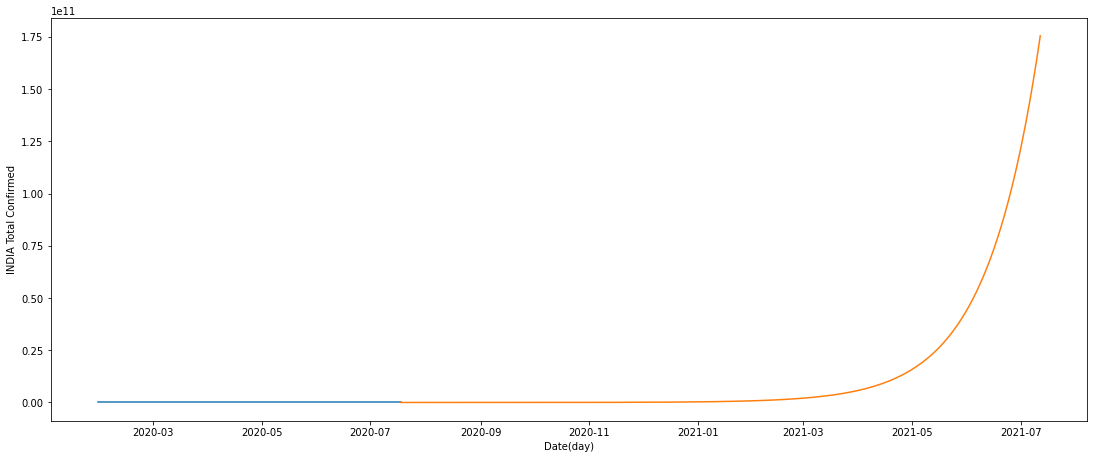

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df0['Date']
position =df0['Total Confirmed']

time1 = final['Date']
position1 = final['Total Confirmed']
axes.plot(time, position)
axes.plot(time1, position1)

plt.xlabel('Date(day)')
plt.ylabel('INDIA Total Confirmed')
fig.savefig('INDIA_Total.png')

In [ ]:
#save to Csv
final.to_csv("predict.csv")
pr=pd.read_csv('predict.csv')
pr.head()

,Unnamed: 0,Date,Total Confirmed,Total Deceased,Day
0,0,2020-07-16,1002525.0,25485.0,169
1,1,2020-07-17,1036215.0,26088.0,170
2,2,2020-07-18,1071038.0,26705.0,171
3,3,2020-07-19,1107031.0,27337.0,172
4,4,2020-07-20,1144234.0,27984.0,173


In [ ]:
p=pd.read_csv('predictIN.csv')
p

,Unnamed: 0,Date,Total Confirmed,Total Deceased,Day
0,0,2020-06-19,395769.0,13164.0,142
1,1,2020-06-20,410135.0,13900.0,143
2,2,2020-06-21,425022.0,14677.0,144
3,3,2020-06-22,440450.0,15497.0,145
4,4,2020-06-23,456437.0,16363.0,146
5,5,2020-06-24,473005.0,17277.0,147
6,6,2020-06-25,490175.0,18243.0,148
7,7,2020-06-26,507967.0,19262.0,149
8,8,2020-06-27,526405.0,20339.0,150
9,9,2020-06-28,545513.0,21476.0,151


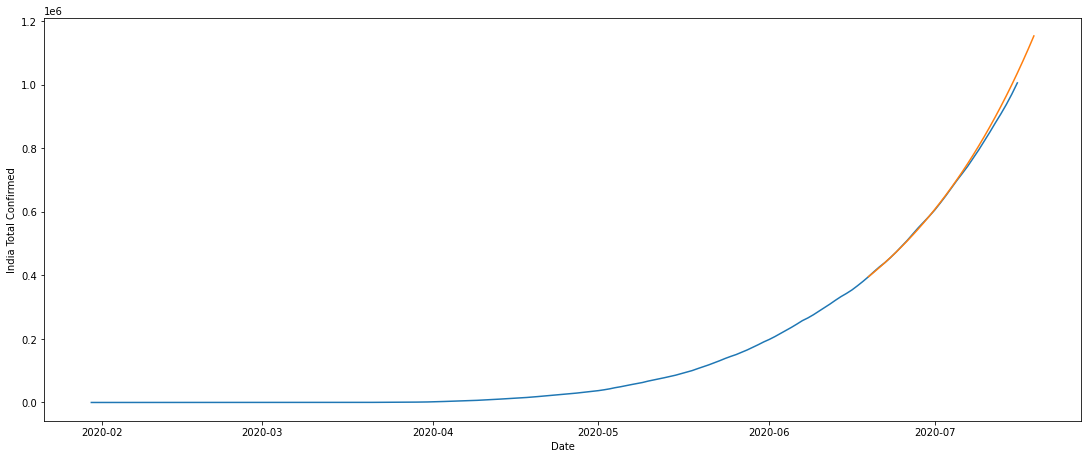

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
p['Date'] = pd.to_datetime(p['Date'])
fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df0['Date']
position =df0['Total Confirmed']

time1 = p['Date']
position1 = p['Total Confirmed']

axes.plot(time, position)
axes.plot(time1, position1)
plt.xlabel('Date')
plt.ylabel('India Total Confirmed')

plt.show()
fig.savefig('IND Total Pred_Vs_Actualpng')

In [61]:
T=df0['Total Confirmed']
#T=T[::-1]
Date = df0["Date"]
H = [None] * len(T)
TM1 = [None] * len(T)
i = 1
while i < len(T):
    TM1[i] =int(T[i-1]) 
    i += 1
#TM1=TM1[::-1]
HDF = {'Date': Date,'TM1' :TM1 ,'T':T}
hdf = pd.DataFrame(data=HDF)
hdf['H value'] = hdf['T'].divide(hdf['TM1'])
hdf = hdf.tail(90)


Text(0, 0.5, 'India H ')

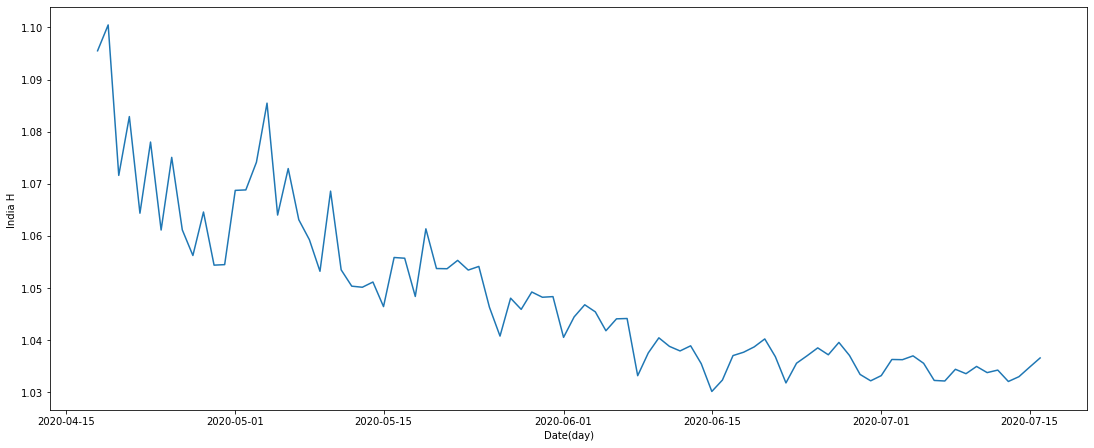

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = hdf['Date']
position =hdf['H value']

axes.plot(time, position)

plt.xlabel('Date(day)')
plt.ylabel('India H ')
plt.show()
fig.savefig('IND H value')

In [73]:
#Doubling Rate for every 7 days 
T=df0['Total Confirmed']
reminder = len(T)%7
if reminder != 0 :
  T = T[:-reminder]
re = ((len(T))//7 )
Week=range(1,re)
T = T. to_numpy()
T=T.reshape(re,7) 
double =  list ([None]*7)
n=0
while n<len(T):
  v= (7*2) / (T[n][6] / T[n][0])
  double.append(v) 
  n= n+1
DRate = pd.DataFrame(list(zip(double, Week)), 
               columns =['DRate', 'Weeks'])
DRate.tail()

,DRate,Weeks
18,8.798390,19
19,9.755330,20
20,9.208671,21
21,10.107026,22
22,10.237594,23


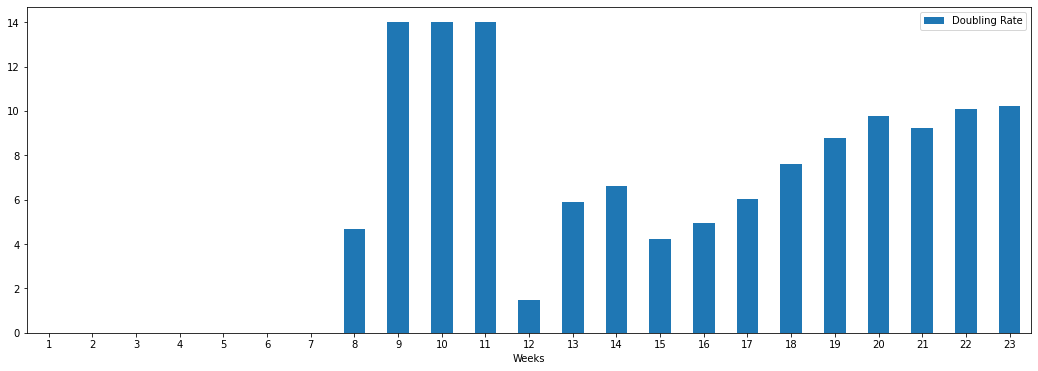

In [72]:
ax = DRate.plot.bar(x='Weeks', y='DRate', rot=0,figsize=(18,6),label='Doubling Rate' )